# Report: Correlation between GDP per capita and the annual unemployment rate across European countries

# Contents:

1.Introduction

2.Data Source

3.Installation of dependencies

4.Loading Data

5.Question

6.Conclusion

7.Future Work

# Introduction:

Correlating the GDP per capita and the annual unemployment rate per thousand for European countries between 2017-2021 can provide insights into the economic dynamics of these countries during the specified time period. The correlation analysis aims to understand the potential relationship between the economic prosperity, as measured by GDP per capita, and the labor market conditions, as reflected in the annual unemployment rate.

1. Is there a statistically significant correlation between GDP per capita and the annual unemployment rate across European countries from 2017 to 2021?

# Data Source:


### Datasource 1: kaggle.com

* Metadata URL 1: https://www.macrotrends.net/countries/ranking/gdp-gross-domestic-product

* Data URL 1:  https://www.kaggle.com/datasets/samuelcortinhas/gdp-of-european-countries?select=GDP_per_capita_table.csv

* Data Type:   CSV  GDP per capita for several European countries between 2017-2021
  

### Datasource 2: eurostat

* Metadata URL 2: https://ec.europa.eu/eurostat/cache/metadata/en/lfsi_esms.htm

* Data URL 2: https://ec.europa.eu/eurostat/databrowser/view/une_rt_a__custom_9447392/default/table?lang=en

* Data Type: CSV    Annual unemployment rate per thousand

# Installation of dependencies :

In [32]:
%pip install pandas
%pip install plotly
%pip install SQLAlchemy==1.4.46
%pip install nbformat
%pip install matplotlib
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------------------------------- ------- 41.0/51.1 kB 2.0 MB/s eta 0:00:01
     -------------------------------- ------- 41.0/51.1 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 327.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------------- -------------- 0.7/1.1 MB 14.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.0/1.1 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/22.9 MB 41.3 MB/s eta 0:00:01
   ------ ---


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Loading data
Creating pandas dataframe using the local sqlite file.

In [33]:
import pandas as pd
import sqlite3
from IPython.display import display

autopipeline = sqlite3.connect(r"D:\FAU\MADE\made-template\data\db_rituparna.sqlite")
df_GDP_per_capita = pd.read_sql_query('SELECT * FROM "GDPcount"', autopipeline)
df_Unemployment_by_sex_age = pd.read_sql_query('SELECT * FROM "Unemployment_rate"', autopipeline)


#Close the database connection
autopipeline.close()

#Display the dataframe
display(df_GDP_per_capita)
display(df_Unemployment_by_sex_age)



,index,year,Belgium,France,Germany,Italy,Poland,Spain
0,0,2017,44198,38781,44653,32407,13865,28170
1,1,2018,47549,41593,47974,34622,15468,30365
2,2,2019,46599,40579,46795,33673,15732,29554
3,3,2020,45189,39037,46253,31835,15742,27056
4,4,2021,51768,43519,50802,35551,17841,30116


,index,TIME,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,European Union - 27 countries (from 2020),24034,22939.0,21252.0,19436.0,17444.0,15643.0,14503.0,15182.0,14984,13291
1,1,Euro area – 20 countries (from 2023),19619,18982.0,17777.0,16517.0,14976.0,13551.0,12568.0,12976.0,12785,11336
2,2,elgium,423,430.0,430.0,395.0,357.0,305.0,278.0,291.0,324,294
3,3,ulgaria,469,417.0,337.0,280.0,240.0,206.0,176.0,201.0,171,140
4,4,Czechia,369,324.0,268.0,211.0,155.0,121.0,109.0,137.0,150,118
5,5,enmark,210,198.0,181.0,176.0,173.0,153.0,152.0,170.0,154,139
6,6,Germany,2026,1941.0,1809.0,1650.0,1510.0,1368.0,1280.0,1555.0,1563,1376
7,7,Estonia,59,50.0,43.0,47.0,40.0,38.0,31.0,48.0,43,40
8,8,Irelan,308,267.0,225.0,195.0,158.0,138.0,121.0,139.0,158,119
9,9,Greece,1344,1277.0,1198.0,1146.0,1043.0,935.0,847.0,791.0,678,588


# Question :

## 1.Is there a statistically significant correlation between GDP per capita and the annual unemployment rate across European countries from 2017 to 2021?

I have show the comparison in scatter plot as well as in bar plot



In [34]:
import pandas as pd

# Assuming unemployment_df and gdp_df are already defined DataFrames

# Filter the unemployment dataframe to include data from 2017 to 2021
unemployment_df_filtered = unemployment_df[['TIME', '2017', '2018', '2019', '2020', '2021']].copy()

# Rename the 'TIME' column to 'Country' for clarity
unemployment_df_filtered.rename(columns={'TIME': 'Country'}, inplace=True)

# Now let's reshape the unemployment data to have 'year' as one of the columns
unemployment_df_melted = unemployment_df_filtered.melt(id_vars=['Country'], var_name='year', value_name='Unemployment')

# We also need to clean the 'Country' column to match the column names in the GDP dataframe
# We will do a simple string replacement for the country names based on the provided images
country_replacements = {
    'elgium': 'Belgium',
    'rance': 'France',
    'ermany': 'Germany',
    'taly': 'Italy',
    'oland': 'Poland',
    'pain': 'Spain'
}

unemployment_df_melted['Country'] = unemployment_df_melted['Country'].replace(country_replacements)

# Filter out rows that don't match the countries in the GDP dataframe
countries = ['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain']
unemployment_df_melted = unemployment_df_melted[unemployment_df_melted['Country'].isin(countries)]

# Convert 'year' to integer in both dataframes to ensure proper merging
unemployment_df_melted['year'] = unemployment_df_melted['year'].astype(int)
gdp_df['year'] = gdp_df['year'].astype(int)

# Merge the GDP dataframe with the reshaped and cleaned unemployment dataframe
merged_df = pd.merge(gdp_df, unemployment_df_melted, how='left', left_on=['year'], right_on=['year'])

# Calculate the correlation for each country
correlations = {}
for country in countries:
    subset = merged_df[['year', country, 'Unemployment']].dropna()
    correlation = subset[country].astype(float).corr(subset['Unemployment'].astype(float))
    correlations[country] = correlation

correlations


{'Belgium': -0.051255312393538754,
 'France': -0.04649160497949552,
 'Germany': -0.057958869962735395,
 'Italy': -0.03215796063528844,
 'Poland': -0.07881173329164551,
 'Spain': -0.01969452145225608}

In [40]:
# Check the column types for the unemployment dataframe to fix the KeyError
unemployment_df.dtypes


TIME     object
2013     object
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021     object
2022     object
dtype: object

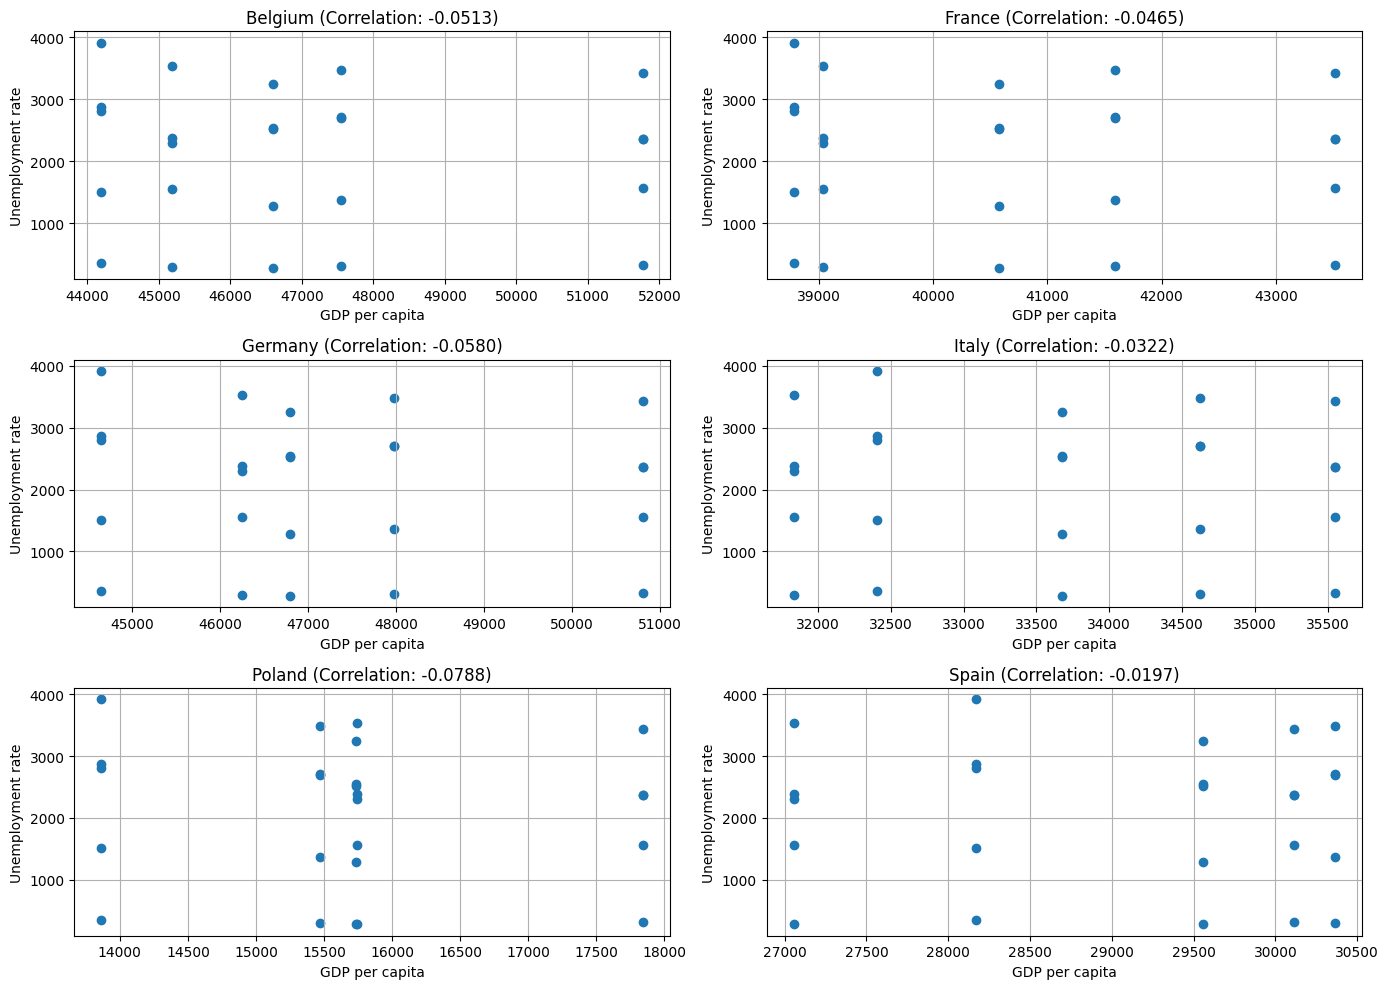

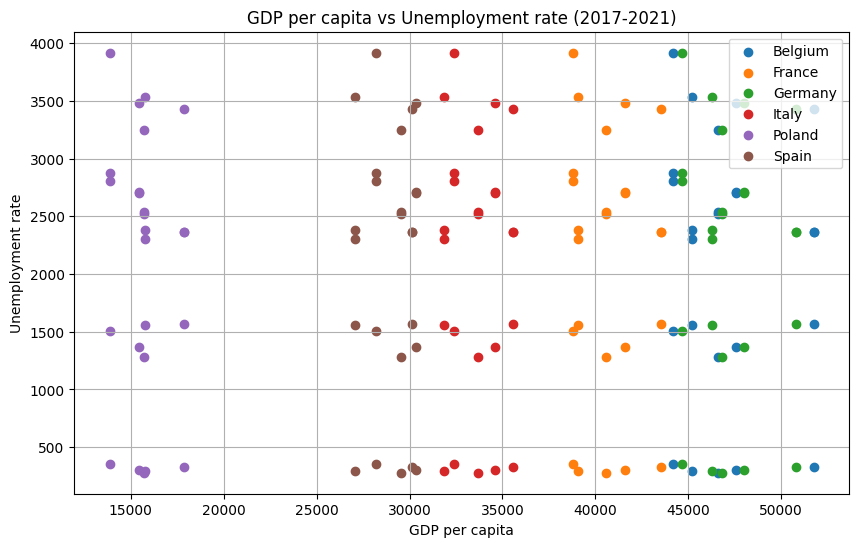

In [36]:
import matplotlib.pyplot as plt

# Create scatter plots for each country
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, country in enumerate(countries):
    # Plotting GDP per capita vs. Unemployment for each country
    subset = merged_df[['year', country, 'Unemployment']].dropna()
    axes[i].scatter(subset[country].astype(float), subset['Unemployment'].astype(float))
    axes[i].set_title(f'{country} (Correlation: {correlations[country]:.4f})')
    axes[i].set_xlabel('GDP per capita')
    axes[i].set_ylabel('Unemployment rate')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Now let's plot all countries in one scatter plot for comparison
plt.figure(figsize=(10, 6))
for country in countries:
    subset = merged_df[['year', country, 'Unemployment']].dropna()
    plt.scatter(subset[country].astype(float), subset['Unemployment'].astype(float), label=f'{country}')

plt.title('GDP per capita vs Unemployment rate (2017-2021)')
plt.xlabel('GDP per capita')
plt.ylabel('Unemployment rate')
plt.legend()
plt.grid(True)
plt.show()


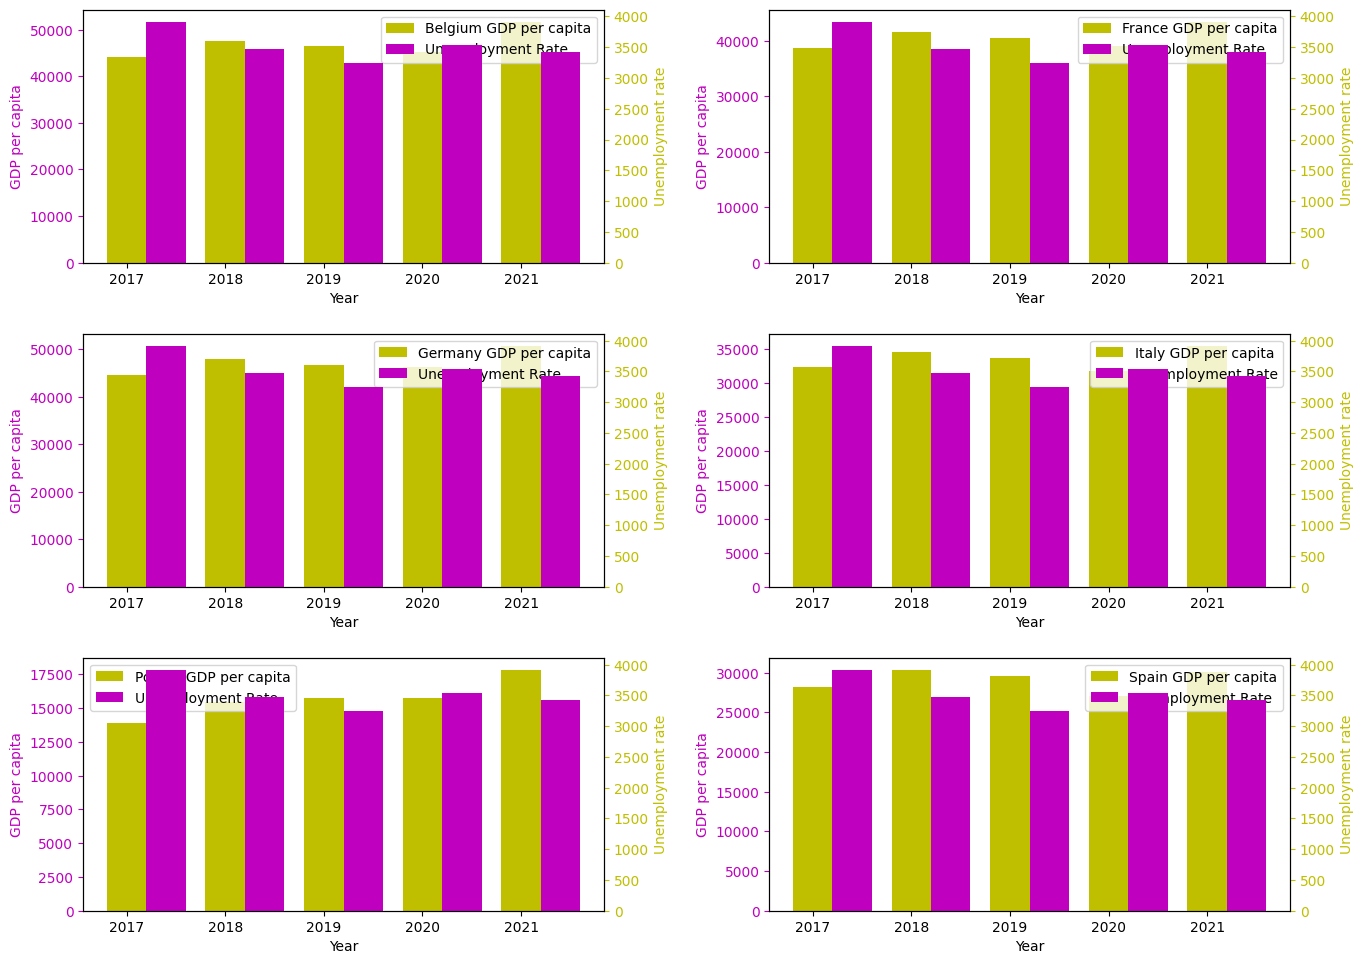

In [37]:
# Create bar plots with a secondary y-axis for unemployment rates
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, country in enumerate(countries):
    ax1 = axes[i]
    # Plot GDP per capita bars
    ax1.bar(merged_df['year'], merged_df[country].astype(float), color='y', label=f'{country} GDP per capita', width=0.4)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP per capita', color='m')
    ax1.tick_params('y', colors='m')

    # Create a secondary y-axis for the unemployment rate
    ax2 = ax1.twinx()
    ax2.bar(merged_df['year'] + 0.4, merged_df['Unemployment'].astype(float), color='m', label='Unemployment Rate', width=0.4)
    ax2.set_ylabel('Unemployment rate', color='y')
    ax2.tick_params('y', colors='y')

    # Add a legend to the plot
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.tight_layout(pad=2.0)
plt.show()


C:\Users\Rituparna Bose\AppData\Local\Temp\ipykernel_5408\426116720.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


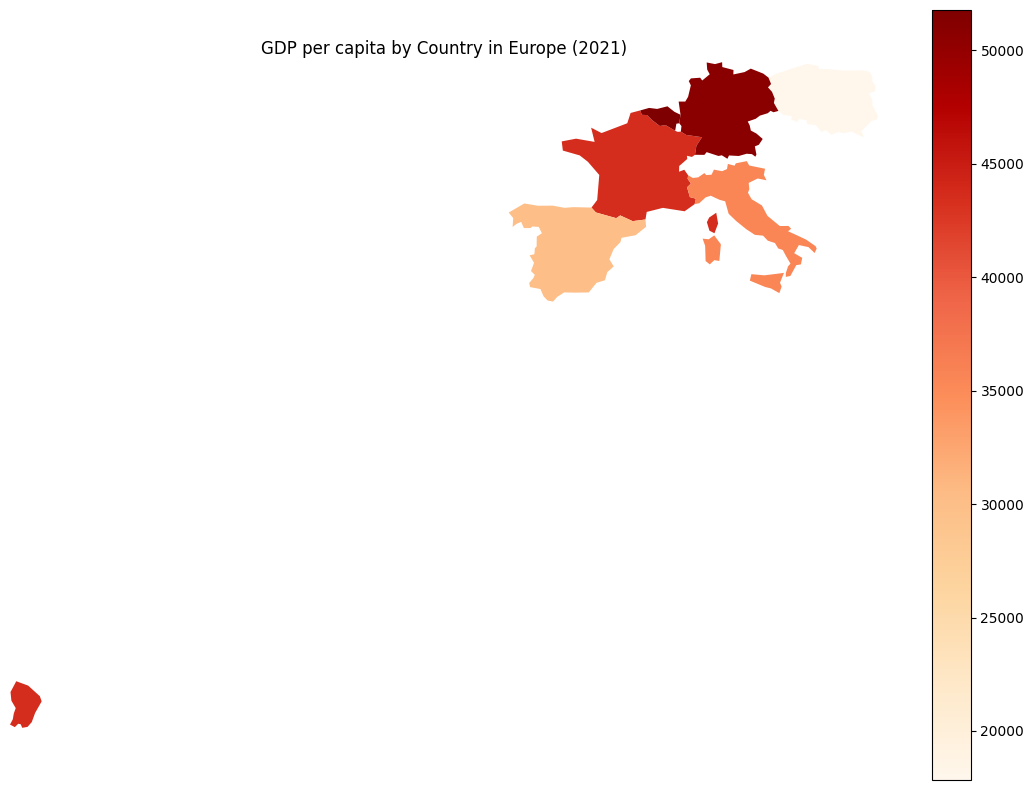

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a GeoDataFrame containing world country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define a dictionary mapping country names to GDP per capita for a specific year (e.g., 2021)
data_for_map = {
    'Belgium': 51768,  # GDP per capita for Belgium in 2021
    'France': 43519,   # GDP per capita for France in 2021
    'Germany': 50802,  # GDP per capita for Germany in 2021
    'Italy': 35551,    # GDP per capita for Italy in 2021
    'Poland': 17841,   # GDP per capita for Poland in 2021
    'Spain': 30116     # GDP per capita for Spain in 2021
}

# Filter the world GeoDataFrame for the European countries of interest
european_countries = ['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain']
selected_countries = world[world['name'].isin(european_countries)]

# Add the GDP per capita data for the year 2021 to the selected countries GeoDataFrame
selected_countries = selected_countries.copy()  # To avoid SettingWithCopyWarning
selected_countries['GDP_2021'] = selected_countries['name'].map(data_for_map)

# Plot the map focusing only on the specified countries for the year 2021 with a larger figure size
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Increase the figure size for a bigger map
selected_countries.plot(column='GDP_2021', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})

# Add title and remove axes
ax.set_title('GDP per capita by Country in Europe (2021)')
ax.set_axis_off()

# Adjust the plot limits to the bounds of the selected countries to zoom in closer
bounds = selected_countries.total_bounds  # Get the bounding box of the selected countries
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Show the map
plt.show()


# Conclusion:

In the conclusion we try to answer the following mentioned questions :

The correlation coefficients for each country are negative, which indicates an inverse relationship between GDP per capita and unemployment rates—suggesting that, generally, as GDP per capita increases, unemployment rates tend to decrease. 

# Future Work :

* Conducting a hypothesis test for correlation significance.
* Performing regression analysis to include multiple variables and control for other factors that may affect unemployment rates.
* Including more countries in the analysis to generalize the findings.
* Investigating non-linear relationships or the presence of outliers that may affect the correlation.
* Considering different time periods to see if the relationship between GDP per capita and unemployment rates changes over time.